In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib as plt 
%matplotlib inline
 
tweet_files = ['nutella2.json']
tweets = []
for file in tweet_files:
    with open(file, 'r') as f:
        for line in f.readlines():
            tweets.append(json.loads(line))

//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
def populate_tweet_df(tweets):
    df = pd.DataFrame()
 
    df['text'] = list(map(lambda tweet: tweet['text'], tweets))
 
    df['location'] = list(map(lambda tweet: tweet['user']['location'], tweets))
 
    df['country_code'] = list(map(lambda tweet: tweet['place']['country_code']
                                  if tweet['place'] != None else '', tweets))
 
    df['long'] = list(map(lambda tweet: tweet['coordinates']['coordinates'][0]
                        if tweet['coordinates'] != None else 'NaN', tweets))
 
    df['latt'] = list(map(lambda tweet: tweet['coordinates']['coordinates'][1]
                        if tweet['coordinates'] != None else 'NaN', tweets))
    
    df['date'] = list(map(lambda tweet: tweet['created_at'], tweets))
 
    return df

In [3]:
df = populate_tweet_df(tweets)

In [4]:
df.shape

(32500, 6)

In [5]:

#merge two dataframes
#df_new = pd.concat([df, df2])


In [6]:
df['date'] = pd.to_datetime(df['date'])
print (df['date'].dtype)


datetime64[ns]


In [7]:
print (df.tail())

                                                    text  \
32495  Nutella-maker Ferrero seeks to crack Turkish g...   
32496  RT @BLAKCEMPIRE: wsh elle a carrément tressé s...   
32497  RT @DaBoyBlackP: Combien de twittos se sont ta...   
32498  Nutella'dan Türkiye'ye kötü haber - https://t....   
32499  RT @kush4heaux: sa carrière non plus https://t...   

                           location country_code long latt                date  
32495   Republic of the Philippines               NaN  NaN 2017-11-03 07:42:39  
32496  Martinique - Fort Lauderdale               NaN  NaN 2017-11-03 07:42:23  
32497  Martinique - Fort Lauderdale               NaN  NaN 2017-11-03 07:41:52  
32498                                             NaN  NaN 2017-11-03 07:41:32  
32499  Martinique - Fort Lauderdale               NaN  NaN 2017-11-03 07:41:08  


In [8]:
#df_new['day'] = df_new['date'].dt.day


In [9]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from textblob import TextBlob
corpus = []
for i in range(0, 32500):
    review = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", df['text'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    blob = TextBlob(review)
    blob_s = blob.sentiment.polarity
    corpus.append(blob_s)

In [10]:
corpus_sub = np.array(corpus)
print corpus_sub

polarity1 = pd.DataFrame(corpus_sub)


[ 0.  0.  0. ...,  0.  0.  0.]


In [11]:
df['polarity'] = polarity1

print df['polarity'].tail(100)



32400    0.000000
32401    0.000000
32402    0.000000
32403    0.000000
32404    0.000000
32405    0.000000
32406    0.000000
32407    0.000000
32408    0.000000
32409    0.000000
32410    0.000000
32411    0.000000
32412    0.000000
32413    0.000000
32414    0.000000
32415    0.000000
32416    0.000000
32417    0.000000
32418    0.000000
32419    0.000000
32420    0.000000
32421    0.000000
32422    0.000000
32423    0.000000
32424    0.000000
32425    0.000000
32426    0.000000
32427   -0.250000
32428    0.000000
32429    0.000000
           ...   
32470    0.000000
32471    0.000000
32472    0.000000
32473    0.000000
32474    0.333333
32475    0.000000
32476    0.000000
32477    0.000000
32478    0.000000
32479    0.000000
32480    0.000000
32481    0.000000
32482    0.357143
32483    0.000000
32484    0.000000
32485    0.000000
32486    0.000000
32487    0.136364
32488    0.000000
32489    0.000000
32490    0.000000
32491    0.000000
32492    0.000000
32493    0.000000
32494    0

In [12]:


def days_late_xform(dl):
    if dl > 0.2: return 'Positive'
    elif 0 < dl <= 0.2: return 'Neutral'
    elif dl <= 0: return 'Negative'
    
df['tweets_polarity'] = df['polarity'].map(days_late_xform)


print df.tweets_polarity.value_counts()


Negative    29681
Positive     2198
Neutral       621
Name: tweets_polarity, dtype: int64


In [13]:
# df.index = df['date']

# df['polarity'].resample('D').mean().plot()


In [14]:
#create later half dataset

In [15]:
import json
import pandas as pd
import numpy as np
import matplotlib as plt 
%matplotlib inline
 
tweet_files = ['nutella.json']
tweets2 = []
for file in tweet_files:
    with open(file, 'r') as f:
        for line in f.readlines():
            tweets2.append(json.loads(line))

In [16]:
def populate_tweet_df(tweets):
    df = pd.DataFrame()
 
    df['text'] = list(map(lambda tweet: tweet['text'], tweets))
 
    df['location'] = list(map(lambda tweet: tweet['user']['location'], tweets))
 
    df['country_code'] = list(map(lambda tweet: tweet['place']['country_code']
                                  if tweet['place'] != None else '', tweets))
 
    df['long'] = list(map(lambda tweet: tweet['coordinates']['coordinates'][0]
                        if tweet['coordinates'] != None else 'NaN', tweets))
 
    df['latt'] = list(map(lambda tweet: tweet['coordinates']['coordinates'][1]
                        if tweet['coordinates'] != None else 'NaN', tweets))
    
    df['date'] = list(map(lambda tweet: tweet['created_at'], tweets))
 
    return df

In [17]:
df2 = populate_tweet_df(tweets2)

In [18]:
df2.shape

(68020, 6)

In [19]:
df2['date'] = pd.to_datetime(df2['date'])
print (df2['date'].dtype)


datetime64[ns]


In [20]:
print df2.head()

print df2.tail()

                                                text                location  \
0  RT @Samuelalvz: tem gente que o hobbie favorit...  Rio de Janeiro, Brasil   
1  Merci à @nodeynguyen et ses invités de marque,...                   Paris   
2  RT @MPB_Online: Sinto dizer que amo mesmo, tá ...   moro no país tropical   
3  RT @CatrinNye: It’s a paratha nutella morning....                      UK   
4  RT @ahmedsamiread: أعلنت شركة Ferrero انه سيتم...                           

  country_code long latt                date  
0               NaN  NaN 2017-11-11 11:05:06  
1               NaN  NaN 2017-11-11 11:05:02  
2               NaN  NaN 2017-11-11 11:04:48  
3               NaN  NaN 2017-11-11 11:04:21  
4               NaN  NaN 2017-11-11 11:04:13  
                                                    text          location  \
68015  RT @SkyNews: Nutella has changed, and people a...                     
68016  Acordo lendo os juízes do rap falando do q é r...  zona morte - 051   
680

In [21]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from textblob import TextBlob
corpus = []
for i in range(0, 68019):
    review = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", df2['text'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    blob = TextBlob(review)
    blob_s = blob.sentiment.polarity
    corpus.append(blob_s)

In [22]:
corpus_sub = np.array(corpus)
print corpus_sub

polarity2 = pd.DataFrame(corpus_sub)


[ 0.  0.  0. ...,  0.  0.  0.]


In [23]:
df2['polarity'] = polarity2

print df2['polarity'].tail(100)



67920    0.000000
67921    0.000000
67922    0.000000
67923    0.000000
67924    0.357143
67925    0.033333
67926   -0.200000
67927    0.033333
67928    0.033333
67929    0.033333
67930    0.033333
67931    0.000000
67932    0.000000
67933    0.000000
67934   -0.200000
67935    0.033333
67936    0.000000
67937    0.000000
67938    0.000000
67939    0.033333
67940    0.000000
67941    0.000000
67942    0.000000
67943    0.000000
67944    0.000000
67945    0.033333
67946    0.000000
67947    0.033333
67948    0.033333
67949    0.033333
           ...   
67990    0.000000
67991    0.500000
67992    0.000000
67993    0.000000
67994    0.000000
67995    0.000000
67996    0.000000
67997    0.000000
67998    0.000000
67999    0.000000
68000    0.000000
68001    0.000000
68002    0.000000
68003    0.000000
68004    0.000000
68005    0.000000
68006    0.000000
68007    0.000000
68008    0.000000
68009    0.357143
68010    0.000000
68011    0.000000
68012    0.000000
68013    0.000000
68014    0

In [24]:


def days_late_xform(dl):
    if dl > 0.2: return 'Positive'
    elif 0 < dl <= 0.2: return 'Neutral'
    elif dl <= 0: return 'Negative'
    
df2['tweets_polarity'] = df2['polarity'].map(days_late_xform)


print df2.tweets_polarity.value_counts()


Negative    60429
Positive     4038
Neutral      3552
Name: tweets_polarity, dtype: int64


In [25]:
# df2.index = df2['date']

# df2['polarity'].resample('D').mean().plot()


In [26]:
df2 = df2.reset_index(drop=True)
print df2.head()

                                                text                location  \
0  RT @Samuelalvz: tem gente que o hobbie favorit...  Rio de Janeiro, Brasil   
1  Merci à @nodeynguyen et ses invités de marque,...                   Paris   
2  RT @MPB_Online: Sinto dizer que amo mesmo, tá ...   moro no país tropical   
3  RT @CatrinNye: It’s a paratha nutella morning....                      UK   
4  RT @ahmedsamiread: أعلنت شركة Ferrero انه سيتم...                           

  country_code long latt                date  polarity tweets_polarity  
0               NaN  NaN 2017-11-11 11:05:06       0.0        Negative  
1               NaN  NaN 2017-11-11 11:05:02       0.0        Negative  
2               NaN  NaN 2017-11-11 11:04:48       0.0        Negative  
3               NaN  NaN 2017-11-11 11:04:21       0.0        Negative  
4               NaN  NaN 2017-11-11 11:04:13       0.0        Negative  


In [27]:
df2_new = df2[['polarity', 'date']]

print df2_new.tail()

       polarity                date
68015       0.0 2017-11-07 09:27:53
68016       0.0 2017-11-07 09:27:48
68017       0.0 2017-11-07 09:27:42
68018       0.0 2017-11-07 09:27:19
68019       NaN 2017-11-07 09:27:15


In [28]:
df_new = df[['polarity', 'date']]

print df_new.tail()

       polarity                date
32495       0.0 2017-11-03 07:42:39
32496       0.0 2017-11-03 07:42:23
32497       0.0 2017-11-03 07:41:52
32498       0.0 2017-11-03 07:41:32
32499       0.0 2017-11-03 07:41:08


In [29]:
df_all_new = pd.concat([df2_new, df_new])

print df_all_new.tail()

       polarity                date
32495       0.0 2017-11-03 07:42:39
32496       0.0 2017-11-03 07:42:23
32497       0.0 2017-11-03 07:41:52
32498       0.0 2017-11-03 07:41:32
32499       0.0 2017-11-03 07:41:08


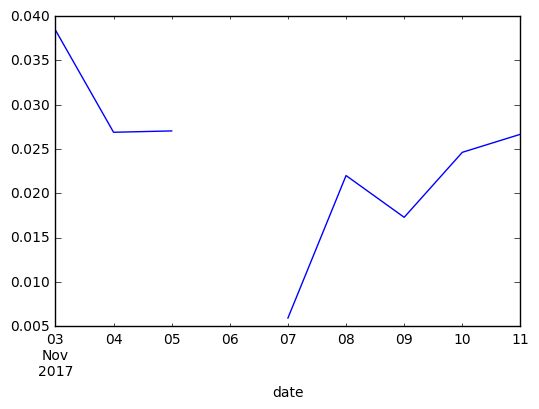

In [30]:
df_all_new.index = df_all_new['date']

df_all_new['polarity'].resample('D').mean().plot()


In [31]:
import json
import pandas as pd
import numpy as np
import matplotlib as plt 
%matplotlib inline
 
tweet_files = ['nutella6nov.json']
tweets3 = []
for file in tweet_files:
    with open(file, 'r') as f:
        for line in f.readlines():
            tweets3.append(json.loads(line))

In [32]:
df3 = populate_tweet_df(tweets3)

In [33]:
df3.shape

(14231, 6)

In [34]:
df2['date'] = pd.to_datetime(df2['date'])
print (df2['date'].dtype)


datetime64[ns]


In [35]:
df3.head()

,text,location,country_code,long,latt,date
0,RT @sisoytanDulce: Cuando se te antoja una cre...,,,NaN,NaN,Mon Nov 06 23:59:53 +0000 2017
1,RT @iahgos: carai parece eu quando resolvo sai...,"Paraná, Brasil",,NaN,NaN,Mon Nov 06 23:59:53 +0000 2017
2,RT @SkyNews: Nut for us: Fans' fury as Nutella...,Sussex,,NaN,NaN,Mon Nov 06 23:59:48 +0000 2017
3,Nutella fans go nuts after company secretly ch...,,,NaN,NaN,Mon Nov 06 23:59:47 +0000 2017
4,He apagado ya la tele y me he traído un bote d...,Wisteria Lane,,NaN,NaN,Mon Nov 06 23:59:41 +0000 2017


In [43]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from textblob import TextBlob
corpus = []
for i in range(0, 14231):
    review = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", df3['text'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    blob = TextBlob(review)
    blob_s = blob.sentiment.polarity
    corpus.append(blob_s)

In [44]:
corpus_sub = np.array(corpus)
print corpus_sub

polarity3 = pd.DataFrame(corpus_sub)


[ 0.  0.  0. ...,  0.  0.  0.]


In [45]:
df3['polarity'] = polarity3

print df3['polarity'].tail(100)



14131    0.000000
14132    0.000000
14133    0.000000
14134    0.000000
14135    0.000000
14136    0.000000
14137    0.000000
14138    0.000000
14139    0.000000
14140    0.000000
14141    0.000000
14142    0.000000
14143    0.000000
14144    0.000000
14145    0.000000
14146    0.000000
14147    0.000000
14148    0.578788
14149    0.000000
14150    0.000000
14151    0.136364
14152    0.000000
14153    0.000000
14154    0.000000
14155    0.000000
14156    0.000000
14157    0.000000
14158   -0.800000
14159    0.000000
14160    0.000000
           ...   
14201    0.000000
14202    0.000000
14203    0.800000
14204    0.000000
14205    0.000000
14206    0.000000
14207    0.000000
14208    0.000000
14209    0.000000
14210    0.000000
14211    0.250000
14212    0.000000
14213    0.000000
14214    0.000000
14215    0.000000
14216    0.000000
14217    0.000000
14218    0.000000
14219    0.578788
14220    0.800000
14221    0.000000
14222    0.000000
14223    0.000000
14224    0.000000
14225    0

In [46]:
df3['date'] = pd.to_datetime(df3['date'])
print (df3['date'].dtype)


datetime64[ns]


In [70]:
df3.sort(columns='polarity', ascending=False)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,text,location,country_code,long,latt,date,polarity
450,The Best Ways to Use Nutella - https://t.co/oo...,,,NaN,NaN,2017-11-06 23:16:16,1.0
531,I swear to god Conor’s gonna pour Nutella into...,"Strathaven, Scotland",,NaN,NaN,2017-11-06 23:11:21,1.0
7116,"Best personalised Christmas gifts for men, wom...",e-mediagroup@outlook.com,,NaN,NaN,2017-11-06 15:16:31,1.0
1561,The Best Ways to Use Nutella - https://t.co/ug...,,,NaN,NaN,2017-11-06 21:58:00,1.0
12324,The best Nutella alternatives you should try i...,London,,NaN,NaN,2017-11-06 04:25:04,1.0
4745,@AlissaViolet I dipped a banana in Nutella and...,Kuwait,,NaN,NaN,2017-11-06 18:29:05,1.0
9772,Toast Necklaces Best Friends peanut butter to...,Glasgow,,NaN,NaN,2017-11-06 10:37:43,1.0
434,The Best Ways to Use Nutella - https://t.co/8m...,,,NaN,NaN,2017-11-06 23:17:25,1.0
9534,The Best Ways to Use Nutella: https://t.co/May...,,,NaN,NaN,2017-11-06 11:02:00,1.0
2262,The Best Ways to Use Nutella - https://t.co/wz...,Colorado Springs\r,,NaN,NaN,2017-11-06 21:14:13,1.0


In [69]:
#Example of a negative tweet 

print df3.iloc[13648]


text            RT @JoshHelaku: Nutella is garbage and if you ...
location                                       Westside Rock City
country_code                                                     
long                                                          NaN
latt                                                          NaN
date                                          2017-11-06 01:17:52
polarity                                                     -0.8
Name: 13648, dtype: object


In [71]:
#Example of a positive tweet 

print df3.iloc[450]


text            The Best Ways to Use Nutella - https://t.co/oo...
location                                                         
country_code                                                     
long                                                          NaN
latt                                                          NaN
date                                          2017-11-06 23:16:16
polarity                                                        1
Name: 450, dtype: object


In [47]:
df3_new = df3[['polarity', 'date']]

print df3_new.tail()

       polarity                date
14226       0.0 2017-11-06 00:01:01
14227       0.0 2017-11-06 00:00:52
14228       0.0 2017-11-06 00:00:48
14229       0.0 2017-11-06 00:00:06
14230       0.0 2017-11-06 00:00:03


In [48]:
df_all_new_all = pd.concat([df3_new, df_all_new])

print df_all_new_all.tail()

                     polarity                date
2017-11-03 07:42:39       0.0 2017-11-03 07:42:39
2017-11-03 07:42:23       0.0 2017-11-03 07:42:23
2017-11-03 07:41:52       0.0 2017-11-03 07:41:52
2017-11-03 07:41:32       0.0 2017-11-03 07:41:32
2017-11-03 07:41:08       0.0 2017-11-03 07:41:08


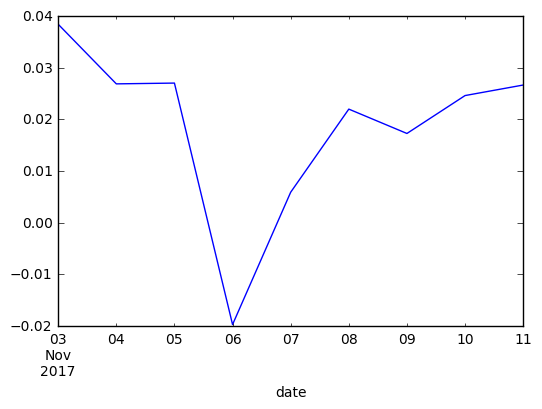

In [49]:
df_all_new_all.index = df_all_new_all['date']

df_all_new_all['polarity'].resample('D').mean().plot()
